In [2]:
import numpy as np
import pandas as pd
import copy
import time
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence # 直接获取pdp数组的方法
from scipy.interpolate import splev, splrep # 数据平滑插值

In [3]:
data=pd.read_excel(r'data.xlsx')
chuli=data.iloc[:,:5]
chuli.columns=['h','dg','o','charge','pass-wa']
chuli

,h,dg,o,charge,pass-wa
0,0.7,1.3,0.4913,-0.1,257.92
1,0.8,1.3,0.0000,-0.1,303.89
2,0.8,1.3,0.4913,-0.1,289.23
3,0.8,1.3,0.9825,-0.1,195.35
4,0.8,1.3,1.4737,-0.1,158.72
...,...,...,...,...,...
731,1.0,1.1,1.7190,0.2,150.15
732,1.1,1.1,0.0000,0.2,194.88
733,1.1,1.1,0.7369,0.2,191.84
734,1.1,1.1,1.2810,0.2,186.53


In [4]:
X=chuli.drop(['pass-wa'],axis=1)
y=chuli['pass-wa']
X

,h,dg,o,charge
0,0.7,1.3,0.4913,-0.1
1,0.8,1.3,0.0000,-0.1
2,0.8,1.3,0.4913,-0.1
3,0.8,1.3,0.9825,-0.1
4,0.8,1.3,1.4737,-0.1
...,...,...,...,...
731,1.0,1.1,1.7190,0.2
732,1.1,1.1,0.0000,0.2
733,1.1,1.1,0.7369,0.2
734,1.1,1.1,1.2810,0.2


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20)
}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_test1)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 8, 'n_estimators': 140}, 0.9542369678944091)

In [6]:
rf = RandomForestRegressor(max_depth = 8,n_estimators = 140)

In [7]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=140)

In [8]:
a = rf.score(X_train,y_train)
a

0.9866208649811403

In [9]:
b = rf.score(X_test,y_test)
b

0.9384992294964052

In [10]:
# 评估特征重要性
rf.feature_importances_

array([0.08181153, 0.69473761, 0.11784654, 0.10560432])

In [11]:
from pdpbox import pdp, info_plots

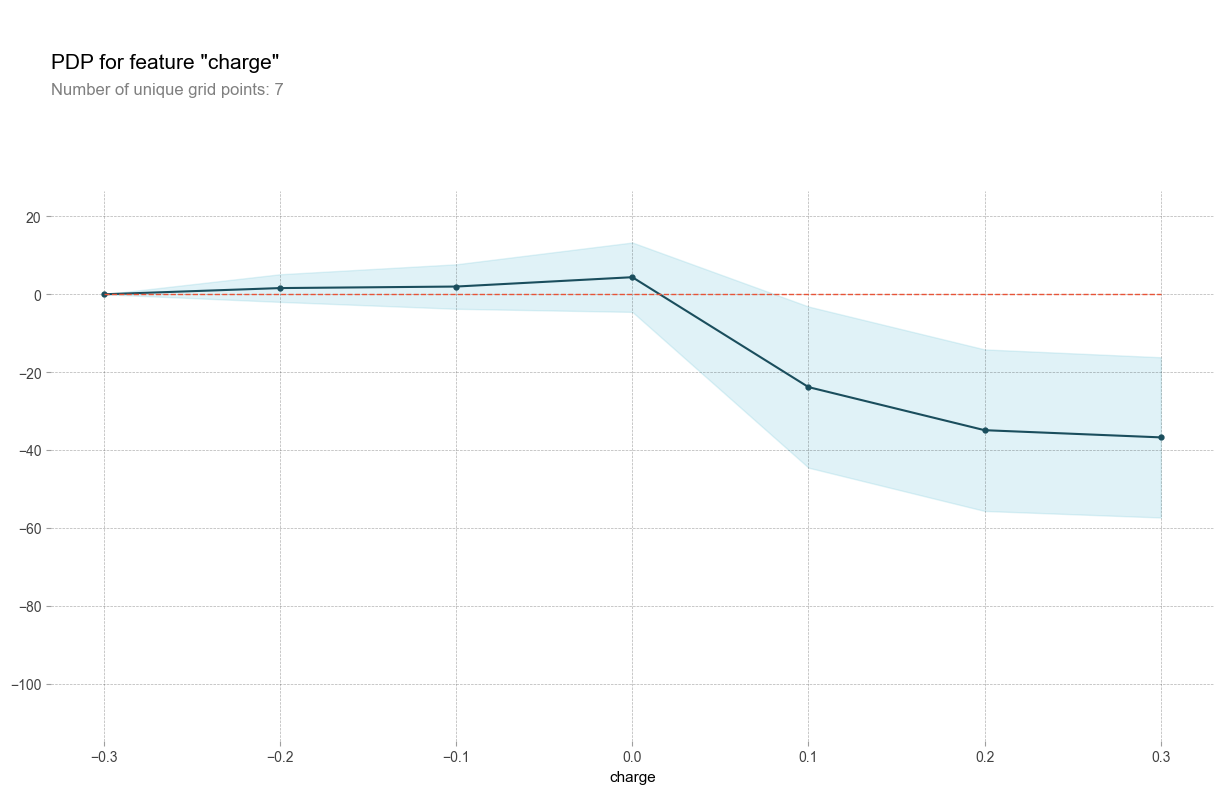

In [17]:
feature_names = ['h','dg','o','charge']
feat_name = 'charge'
pdp_goals1 = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'charge')
plt.show()

In [12]:
# 导出预测值和实际值
data_pred = rf.predict(X_test)

In [13]:
df = pd.DataFrame({'actual':y_test,'pred':data_pred})
df

,actual,pred
669,165.98,167.681865
33,238.61,231.666579
549,127.29,114.647285
199,99.16,113.581145
264,83.03,92.047300
...,...,...
70,242.59,251.588011
329,97.45,92.986419
599,118.34,116.726961
259,144.80,142.449482


In [48]:
df.to_csv('RF_water_pred.csv')

In [14]:
data_pred1 = rf.predict(X_train)

In [15]:
df1 = pd.DataFrame({'actual':y_train,'pred':data_pred1})
df1

,actual,pred
135,250.78,257.018282
545,89.79,96.951402
497,238.30,230.202253
340,226.95,224.781105
165,248.94,241.870957
...,...,...
71,209.10,202.195229
106,238.33,239.846948
270,101.85,103.076332
435,152.93,143.963570


In [51]:
df1.to_csv('RF_water_pred_train.csv')

In [16]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y_test,data_pred))

14.60429706454846

In [17]:
mean_absolute_error(y_test,data_pred)

11.090964036759685

In [18]:
# 评估训练集RMSE,MAE
np.sqrt(mean_squared_error(y_train,data_pred1)),mean_absolute_error(y_train,data_pred1)

(7.146382451190917, 5.72341324686655)

## ------------------------------------------------------Na离子截留率-------------------------------------------------------------------

In [19]:
j=data
j.columns=['h','dg','o','charge','pass-wa','Na rejection','Cl rejection']
j

,h,dg,o,charge,pass-wa,Na rejection,Cl rejection
0,0.7,1.3,0.4913,-0.1,257.92,0.08110,0.10896
1,0.8,1.3,0.0000,-0.1,303.89,0.00000,0.00000
2,0.8,1.3,0.4913,-0.1,289.23,0.15325,0.12594
3,0.8,1.3,0.9825,-0.1,195.35,0.59020,0.59020
4,0.8,1.3,1.4737,-0.1,158.72,1.00000,1.00000
...,...,...,...,...,...,...,...
731,1.0,1.1,1.7190,0.2,150.15,0.74460,0.74460
732,1.1,1.1,0.0000,0.2,194.88,0.64549,0.61000
733,1.1,1.1,0.7369,0.2,191.84,0.56808,0.47550
734,1.1,1.1,1.2810,0.2,186.53,0.49718,0.47204


In [20]:
y1=j['Na rejection']
x1_train,x1_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=40)

In [20]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20)
}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_test1)
gsearch1.fit(x1_train,y1_train)
gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 7, 'n_estimators': 60}, 0.8619503049767034)

In [21]:
gb1 = RandomForestRegressor(max_depth = 7,n_estimators = 40)

In [22]:
gb1.fit(x1_train,y1_train)

RandomForestRegressor(max_depth=7, n_estimators=40)

In [23]:
a1 = gb1.score(x1_train,y1_train)
a1

0.9414181989352934

In [24]:
b1 = gb1.score(x1_test,y1_test)
b1

0.842796109435626

In [28]:
gb1.feature_importances_

array([0.21880438, 0.37691108, 0.32530282, 0.07898172])

In [26]:
# 导出预测值和实际值
data_pred2 = gb1.predict(x1_test)

In [27]:
df2 = pd.DataFrame({'actual':y1_test,'pred':data_pred2})
df2

,actual,pred
450,0.8858,0.714672
463,0.7188,0.728609
335,0.6264,0.390553
331,1.0000,0.847624
333,0.0673,0.175536
...,...,...
426,0.6159,0.624321
140,0.2530,0.193200
62,1.0000,0.999127
457,0.6159,0.642312


In [56]:
df2.to_csv('rf_na_pred_test.csv')

In [29]:
data_pred3 = gb1.predict(x1_train)

In [30]:
df3 = pd.DataFrame({'actual':y1_train,'pred':data_pred3})
df3

,actual,pred
166,0.32110,0.264282
334,0.22058,0.181097
388,0.95190,0.976254
106,0.37870,0.374162
724,0.57257,0.621632
...,...,...
440,0.54200,0.703324
165,0.34630,0.379044
7,0.21504,0.141953
219,1.00000,0.995171


In [31]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y1_test,data_pred2))

0.11248305188426967

In [32]:
mean_absolute_error(y1_test,data_pred2)

0.08420872836567787

In [33]:
# 评估训练集RMSE,MAE
np.sqrt(mean_squared_error(y1_train,data_pred3)),mean_absolute_error(y1_train,data_pred3)

(0.06395985012410628, 0.049601785758950044)

In [59]:
df3.to_csv('RF_na_pred_train.csv')

## ------------------------------------------------------Cl离子截留率预测-------------------------------------------------------------------

In [34]:
y2=j['Cl rejection']

In [35]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.2,random_state=40)

In [39]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20)
}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_test1)
gsearch1.fit(x2_train,y2_train)
gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 7, 'n_estimators': 60}, 0.8635960594701132)

In [36]:
gb2 = RandomForestRegressor(max_depth = 7,n_estimators = 60)

In [37]:
gb2.fit(x2_train,y2_train)

RandomForestRegressor(max_depth=7, n_estimators=60)

In [38]:
a2 = gb2.score(x2_train,y2_train)
a2

0.9413217911749722

In [39]:
b2 = gb2.score(x2_test,y2_test)
b2

0.8671845304916841

In [40]:
# 导出预测值和实际值
data_pred3 = gb2.predict(x2_test)

In [41]:
df3 = pd.DataFrame({'actual':y2_test,'pred':data_pred3})
df3

,actual,pred
450,0.84770,0.678654
463,0.67190,0.684068
335,0.62640,0.440801
331,0.94348,0.782296
333,0.09325,0.166148
...,...,...
426,0.65080,0.637663
140,0.30638,0.208588
62,1.00000,0.976618
457,0.65080,0.658870


In [62]:
df3.to_csv('rf_cl_pred_test.csv')

In [42]:
# 导出预测值和实际值
data_pred4 = gb2.predict(x2_train)

In [43]:
df4 = pd.DataFrame({'actual':y2_train,'pred':data_pred4})
df4

,actual,pred
166,0.29025,0.259021
334,0.19540,0.172262
388,1.00000,0.998939
106,0.35388,0.349074
724,0.53969,0.563151
...,...,...
440,0.50930,0.689969
165,0.34630,0.399809
7,0.21504,0.144746
219,1.00000,0.998834


In [46]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y2_test,data_pred3))

0.10091924371025585

In [47]:
mean_absolute_error(y2_test,data_pred3)

0.07600365640681783

In [48]:
# 评估训练集RMSE,MAE
np.sqrt(mean_squared_error(y2_train,data_pred4)),mean_absolute_error(y2_train,data_pred4)

(0.0641068859917972, 0.049203362216434086)

In [66]:
df4.to_csv('rf_cl_pred_train.csv')

In [49]:
gb2.feature_importances_

array([0.21760134, 0.37594076, 0.33490757, 0.07155033])